## Homework Set #2

### 2.  Limb darkening basics

a) We want to expand the source function with a MacLaurin series: $S_{\nu}(\tau_{\nu})=\Sigma^{\infty}_{n=0}a_n\tau^{n}_{\nu}$. We want to also find an expression for emergent intensity $I^+_{\nu}(\tau_{\nu}=0,\mu)$.

If we have $S_\nu$, then we can say the outward intensity is $I^+_\nu(\tau_\nu,\mu) = \int^\infty_{\tau_\nu}S_\nu(t_\nu)e^{-\frac{(t_\nu-\tau_\nu)}{\mu}}\frac{d\tau_\nu}{\mu}$. 
Going forwards, emergent intensity is at $\tau_\nu = 0$, so we have $I^+_\nu(\tau_\nu = 0,\mu) = \int^\infty_{0}S_\nu(t_\nu)e^{-\frac{(t_\nu)}{\mu}}\frac{dt_\nu}{\mu}$. 
Plugging in the source function, $I^+_\nu(0,\mu) = \int^\infty_{0}\Sigma^{\infty}_{n=0}a_n t^{n}_{\nu}e^{-\frac{(t_\nu)}{\mu}}\frac{dt_\nu}{\mu} = \Sigma^{\infty}_{n=0}a_n\mu^n \int^\infty_{0}(\frac{t_\nu}{\mu})^{n}e^{-\frac{(t_\nu)}{\mu}}\frac{dt_\nu}{\mu} = \Sigma^{\infty}_{n=0}a_n\mu^n \int^\infty_{0}x^{n}e^{-x}dx = \Sigma^{\infty}_{n=0}a_n\mu^n n!$.

b) We want to assume the linear case where $a_n = 0$ when $n\geq2$ and show the Eddington-Barbier value for emergent intensity.

For this assumption, we have $I^+_\nu(0,\mu) = \Sigma^{\infty}_{n=0}a_n\mu^n n! = a_0 \mu^0 0! + a_1\mu^1 1! = a_0 + a_1\mu$ which is the EB value for emergent intensity.

c) Now we want to assume that the $a_2$ value isn't zero and repeat (b).

For $a_2\neq0$, $I^+_\nu(0,\mu) = \Sigma^{\infty}_{n=0}a_n\mu^n n! = a_0 \mu^0 0! + a_1\mu^1 1! + a_2\mu^2 2! = a_0 + a_1 \mu + 6 a_2\mu^2$.

d) Assuming we measure the emergent intensities at 2 points on the sun with known $\mu_1$ and $\mu_2$, we want to find the source function using the EB relation.

By assuming EB, we have $S_{\nu}(\tau_\nu) = a_0+a_1\tau_\nu$ and $I^+_\nu(0,\mu) = a_0 + a_1\mu$. Looking at two spots on the Sun, we have two emergent intensities: $I^+_{\nu,1} = a_0 + a_1\mu_1$ and $I^+_{\nu,2} = a_0 + a_1\mu_2$. Solving the linear equation for $a_1$ first, we find $a_1 = \frac{I^+_{\nu,1}-I^+_{\nu,2}}{\mu_1-\mu_2}$. Plugging this into $I^+_{\nu,1}$ and simplifying, we find $a_0 = \frac{I^+_{\nu,2}\mu_1-I^+_{\nu,1}\mu_2}{\mu_1-\mu_2}$ which makes the source function: $S_\nu(\tau_\nu)=\frac{1}{\mu_1-\mu_2}[I^+_{\nu,2}\mu_1-I^+_{\nu,1}\mu_2+(I^+_{\nu,1}-I^+_{\nu,2})\tau_\nu]$

e) Assuming $a_2>0$, we want to decide if the EB approximation over or underestimates the true source function.

Assuming the real source function, $S_{\nu,r}$, has $a_2>0$ while the EB approximation's source function, $S_{\nu,EB}$, has $a_2=0$, we can subtract the two to find $\Delta S_\nu = S_{\nu,r}-S_{\nu,EB} = a_2\tau^2_\nu$. As $a_2>0$ and $\tau_\nu$ is real, this would imply the difference between the source functions is positive, so the EB approximation underestimates the source function in this reality. 

### I think I need to come back to this

f) Using part (e), we want to tell how we could look at the plot of $S_{\nu,r}(\tau_\nu)$ near $\tau_\nu=\mu$ qualitatively and figure out which direction our EB approximation would be off.

g) We want to determine how many measurements we would need to determine the source function of the sun at some range outside of EB approximations.

Following the logic of linear algebra, for a 2x2 system of linear equations we had two unknowns and needed two measurements (four variables) to solve it. This got us two unknowns, $a_0$ and $a_1$. If we were to go to a quadratic model for the source function, we would have a 3x3 system of linear equations with three unknowns. This would thus require three measurements consisting of six known variables ($\mu_1$, $\mu_2$, $\mu_3$, $I^+_{\nu,1}$, $I^+_{\nu,2}$, $I^+_{\nu,3}$). This pattern would increase to whatever order we want to solve the source function to. At order n$\rightarrow$N, we need to solve a N+1xN+1 system of linear equations consisting of N+1 measurements at N+1 different known $\mu$.

## 3. Integrals of $B_\nu$

### a) Integrator Setup

In [1]:
from importlib import reload
from astropy import units as u
from astropy import constants as const
from astropy.modeling.models import BlackBody
from astropy.units.equivalencies import spectral

import numpy as np
import matplotlib.pyplot as plt

from src import astro530

In [2]:
astro530 = reload(astro530)
BoxInt = astro530.BoxInt
Planck = astro530.Planck
funct_BoxInt = astro530.funct_BoxInt

In [3]:
max_nu = 100
wavenum = np.linspace(0,max_nu,1000)

plk = astro530.Planck(wavenum,7500)

/Users/kdn5172/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [4]:
astro530.BoxInt(wavenum*u.um**-1,plk,style="mp")

<Quantity 0.0001905 erg / (cm2 Hz s sr um)>

In [5]:
funct_BoxInt(0*u.um**-1,100*u.um**-1,n=1000,function=Planck,T=7500)

<Quantity 0.0001905 erg / (cm2 Hz s sr um)>

### b) Determine its precision

In [6]:
analytic_sol = astro530.Planck_Int(7500)
calc = funct_BoxInt(0*u.um**-1,100*u.um**-1,n=1000,function=Planck,T=7500)

In [7]:
error = abs(analytic_sol-calc)/analytic_sol

In [8]:
error

<Quantity 8.72463605e-07>

In [9]:
myplot_specs = {
    'font.size' : 15,              # Larger fonts for labels, axes
    'font.weight':'normal'
}

plt.rcParams.update(myplot_specs)

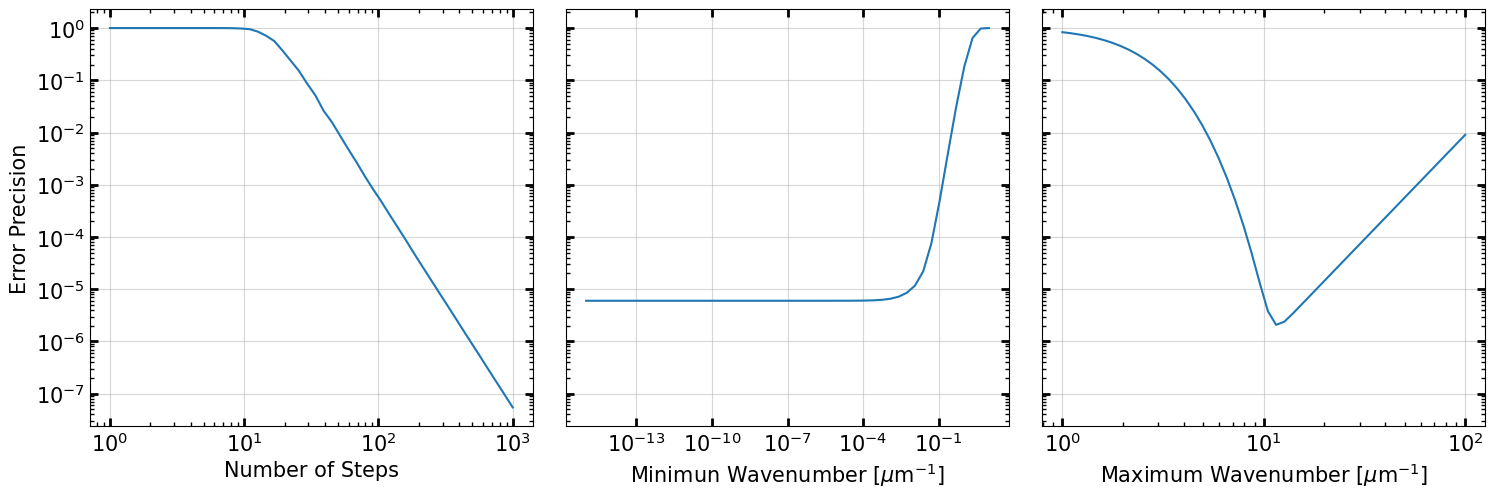

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (15,5), nrows = 1, ncols = 3,squeeze=True,sharey=True)

fig.tight_layout(w_pad=0)
ax = ax1

T = 7500 * u.K
analytic_sol = astro530.Planck_Int(T)

ax1.minorticks_on()
ax1.grid(True,alpha=.5)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax1.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax1.set_ylabel("Error Precision")
ax1.set_xlabel("Number of Steps")
#ax1.set_title("Comparing the Spectral Radiance \n of Planck Function at T = 7000 K")

#ax1.set_xlim([0,12])

n_val = [1,5,10,20,30,40,50,60,70,80,100,200,300,500,1000,3000,5000,10000]
n_val = np.logspace(0,3,50)
#n_val = [10**5]
#int_B = []
error_n = []

for n in n_val:
    int_B = funct_BoxInt(0*u.um**-1,50*u.um**-1,n=n,function=Planck,T=T.value)
    error_n.append(abs(analytic_sol-int_B)/analytic_sol)

ax1.plot(n_val,error_n)

ax2.minorticks_on()
ax2.grid(True,alpha=.5)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax2.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax2.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax2.set_ylabel("Error Precision")
ax2.set_xlabel(r"Minimun Wavenumber [$\mu$m$^{-1}$]")

nu_min = np.logspace(-15,1,50)
error_xmin = []

for xmin in nu_min:
    int_B = funct_BoxInt(xmin*u.um**-1,10*u.um**-1,n=200,function=Planck,T=T.value)
    error_xmin.append(abs(analytic_sol-int_B)/analytic_sol)
    
ax2.plot(nu_min,error_xmin)

ax3.minorticks_on()
ax3.grid(True,alpha=.5)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')

ax3.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax3.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax3.set_ylabel("Error Precision")
ax3.set_xlabel(r"Maximum Wavenumber [$\mu$m$^{-1}$]")

nu_max = np.logspace(0,2,50)
error_xmax = []

for xmax in nu_max:
    int_B = funct_BoxInt(0*u.um**-1,xmax*u.um**-1,n=100,function=Planck,T=T.value)
    error_xmax.append(abs(analytic_sol-int_B)/analytic_sol)
    
ax3.plot(nu_max,error_xmax)

fig.savefig("plots/3b.pdf",bbox_inches='tight')

/Users/kdn5172/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


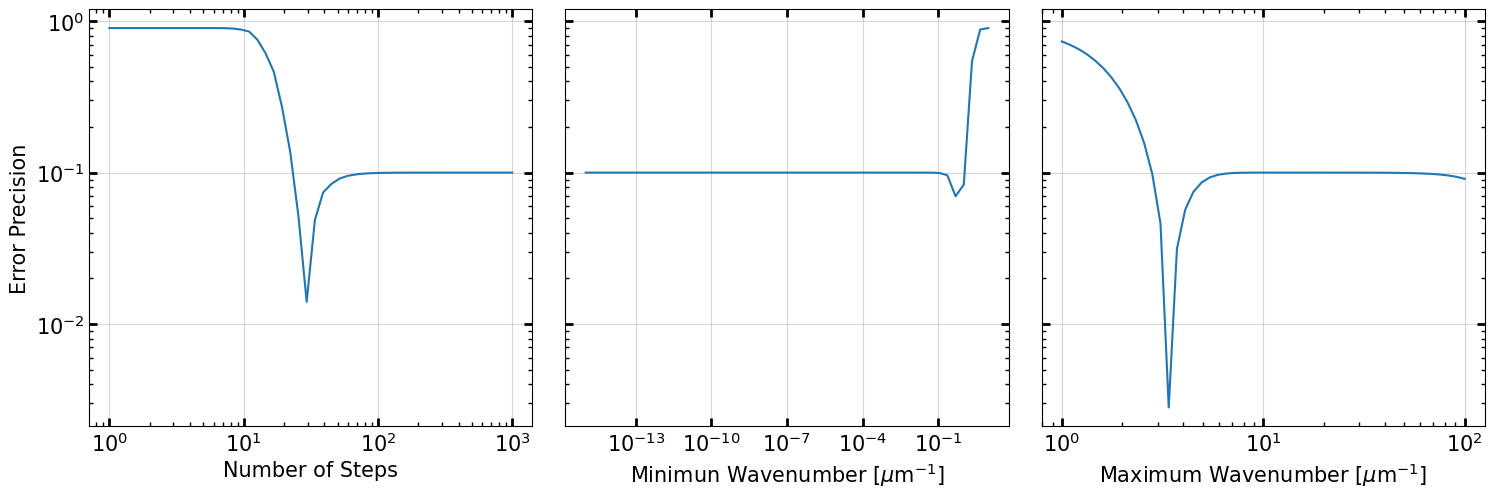

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (15,5), nrows = 1, ncols = 3,squeeze=True,sharey=True)

fig.tight_layout(w_pad=0)
ax = ax1

T = 7500 * u.K
analytic_sol = astro530.Planck_Int(T)

ax1.minorticks_on()
ax1.grid(True,alpha=.5)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax1.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

ax1.set_ylabel("Error Precision")
ax1.set_xlabel("Number of Steps")
#ax1.set_title("Comparing the Spectral Radiance \n of Planck Function at T = 7000 K")

#ax1.set_xlim([0,12])

n_val = [1,5,10,20,30,40,50,60,70,80,100,200,300,500,1000,3000,5000,10000]
n_val = np.logspace(0,3,50)
#n_val = [10**5]
#int_B = []
error_n = []

for n in n_val:
    int_B = funct_BoxInt(0*u.um**-1,50*u.um**-1,n=n,function=Planck,T=T.value)+0.1*analytic_sol
    error_n.append(abs(analytic_sol-int_B)/analytic_sol)

ax1.plot(n_val,error_n)

ax2.minorticks_on()
ax2.grid(True,alpha=.5)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

ax2.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax2.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax2.set_ylabel("Error Precision")
ax2.set_xlabel(r"Minimun Wavenumber [$\mu$m$^{-1}$]")

nu_min = np.logspace(-15,1,50)
error_xmin = []

for xmin in nu_min:
    int_B = funct_BoxInt(xmin*u.um**-1,10*u.um**-1,n=200,function=Planck,T=T.value)+0.1*analytic_sol
    error_xmin.append(abs(analytic_sol-int_B)/analytic_sol)
    
ax2.plot(nu_min,error_xmin)

ax3.minorticks_on()
ax3.grid(True,alpha=.5)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')

ax3.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax3.tick_params(direction='in', axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax3.set_ylabel("Error Precision")
ax3.set_xlabel(r"Maximum Wavenumber [$\mu$m$^{-1}$]")

nu_max = np.logspace(0,2,50)
error_xmax = []

for xmax in nu_max:
    int_B = funct_BoxInt(0*u.um**-1,xmax*u.um**-1,n=100,function=Planck,T=T.value)+0.1*analytic_sol
    error_xmax.append(abs(analytic_sol-int_B)/analytic_sol)
    
ax3.plot(nu_max,error_xmax)

fig.savefig('plots/3c.pdf',bbox_inches='tight')